### 🚗 Vehicle Fuel Consumption Prediction

##  import libraries

In [56]:
import pandas as pd        # for working with CSV and dataframes
import numpy as np         # for numerical operations
import matplotlib.pyplot as plt   # for plotting
import seaborn as sns             # for data visualization (heatmaps, distributions)
from sklearn.model_selection import train_test_split   # to split train/test sets
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer          # to handle categorical + numeric
from sklearn.pipeline import Pipeline                  # for building end-to-end pipeline
from sklearn.impute import SimpleImputer               # handle missing values
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression        # baseline regression
from sklearn.tree import DecisionTreeRegressor           # decision tree model
from sklearn.ensemble import RandomForestRegressor       # bagging ensemble
from sklearn.ensemble import GradientBoostingRegressor   # boosting ensemble
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




## Data loading

In [57]:
df = pd.read_csv('vehicle_fuel_data.csv')
# Lowercase all column names and replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Example: 'FUEL TANK L' -> 'fuel_tank_l'
#          'CONS. L/100km' -> 'cons._l/100km'

df

,type,cyl,engine_l,fuel_tank_l,cons._l/100km,range_km,fuel_type
0,Passenger,6,2.9,60,6.0,"1,000",Diesel
1,Passenger,6,3.0,66,6.3,"1,048",Diesel
2,Passenger,4,2.0,66,5.6,"1,179",Diesel
3,Passenger,4,2.0,66,5.2,"1,269",Diesel
4,Passenger,6,3.0,66,5.1,"1,294",Diesel
...,...,...,...,...,...,...,...
522,Light Commercial,4,2.0,75,11.7,641,Petrol
523,Light Commercial,4,1.4,55,6.0,917,Petrol
524,Light Commercial,4,1.2,56,6.2,903,Petrol
525,Light Commercial,4,1.2,55,5.9,932,Petrol


In [ ]:
df.info()

## Data preprocessing

In [58]:
df.isnull().sum()

type             1
cyl              0
engine_l         0
fuel_tank_l      0
cons._l/100km    0
range_km         0
fuel_type        0
dtype: int64

In [59]:
# Drop rows where TYPE is missing
df = df.dropna(subset=['type'])

# Verify that missing values are gone
print(df['type'].isna().sum())


0


In [6]:
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
522    False
523    False
524    False
525    False
526    False
Length: 526, dtype: bool

In [60]:
# Remove commas and convert to integer
df['RANGE km'] = df['range_km'].astype(str).str.replace(',', '').astype(int)

# Verify
print(df['RANGE km'].dtype)
print(df['RANGE km'].head())


int32
0    1000
1    1048
2    1179
3    1269
4    1294
Name: RANGE km, dtype: int32


C:\Users\HP\AppData\Local\Temp\ipykernel_20352\3224613049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RANGE km'] = df['range_km'].astype(str).str.replace(',', '').astype(int)


## Data Visualization / Exploration

C:\Users\HP\AppData\Local\Temp\ipykernel_20352\2926424672.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fuel_type', data=df, palette=colors[:df['fuel_type'].nunique()])


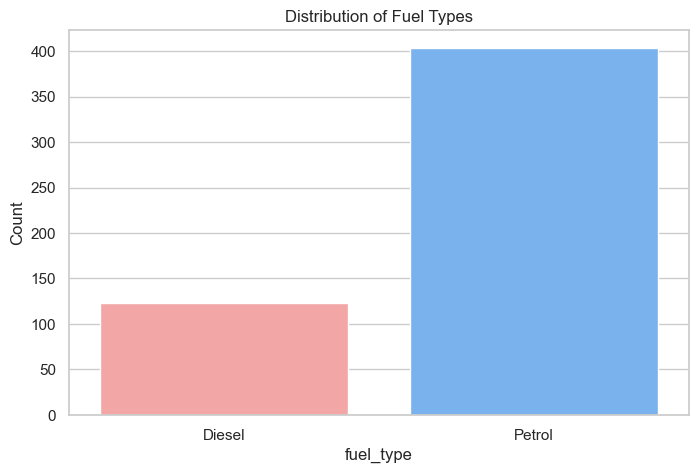

In [15]:

# Optional: set seaborn style
sns.set(style="whitegrid")

# Define custom colors
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF66B2', '#66FFE0', '#FFB266']

# Plot bar chart for fuel types
plt.figure(figsize=(8,5))
sns.countplot(x='fuel_type', data=df, palette=colors[:df['fuel_type'].nunique()])
plt.title('Distribution of Fuel Types')
plt.xlabel('fuel_type')
plt.ylabel('Count')
plt.show()


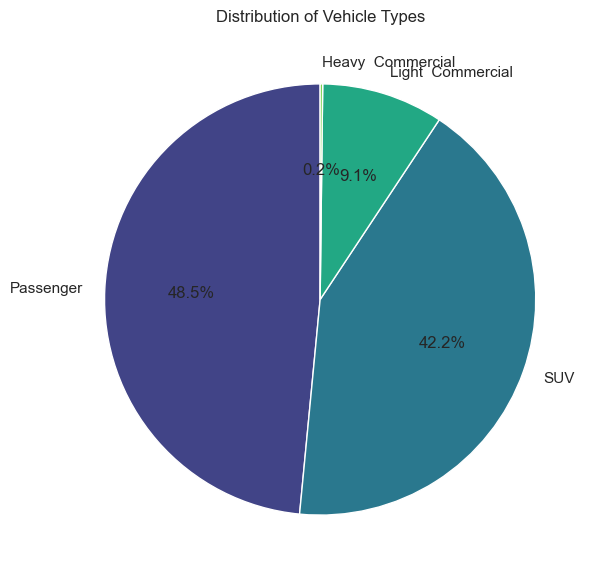

type
Passenger            255
SUV                  222
Light  Commercial     48
Heavy  Commercial      1
Name: count, dtype: int64


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Count values
type_counts = df['type'].value_counts()

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('viridis', len(type_counts))
)
plt.title('Distribution of Vehicle Types')

# ✅ Save chart as PNG
plt.savefig('vehicle_type_distribution.png', dpi=300, bbox_inches='tight')

# Show chart
plt.show()

# Print counts
print(type_counts)



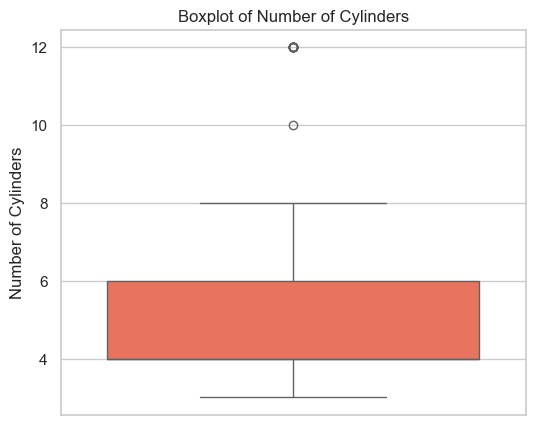

In [35]:

# Plot boxplot for CYL
plt.figure(figsize=(6,5))
sns.boxplot(y=df['cyl'], color='#FF6347')  # vertical boxplot
plt.title('Boxplot of Number of Cylinders')
plt.ylabel('Number of Cylinders')
plt.show()


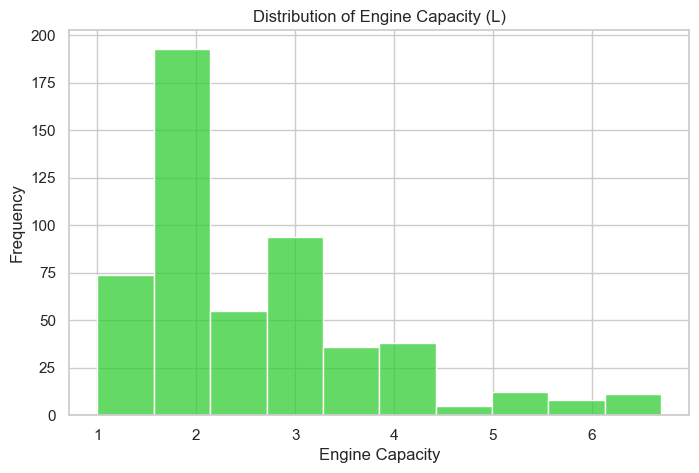

<Figure size 640x480 with 0 Axes>

In [36]:

# Plot histogram for ENGINE L
plt.figure(figsize=(8,5))
sns.histplot(df['engine_l'], bins=10, kde=False, color='#32CD32')
plt.title('Distribution of Engine Capacity (L)')
plt.xlabel('Engine Capacity')
plt.ylabel('Frequency')
plt.show()
#plt.savefig("engine l histogram.png")
plt.savefig('Distribution of Vehicle Range (km)',dpi=100)
#plt.savefig('Distribution of Engine Capacity (L).png', dpi=100)

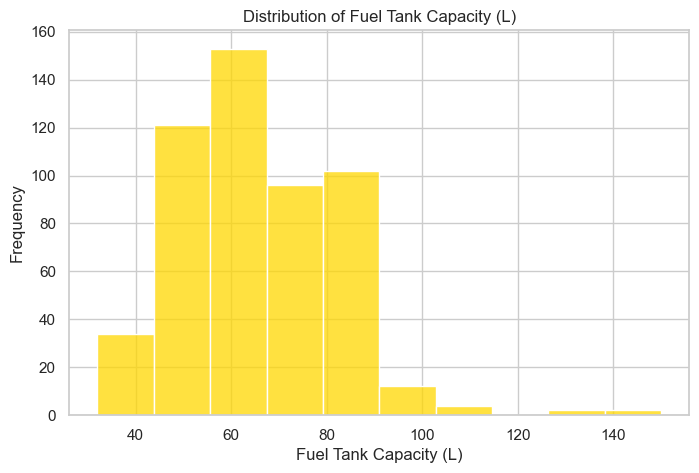

<Figure size 640x480 with 0 Axes>

In [37]:

# Plot histogram for FUEL TANK L
plt.figure(figsize=(8,5))
sns.histplot(df['fuel_tank_l'], bins=10, kde=False, color='#FFD700')
plt.title('Distribution of Fuel Tank Capacity (L)')
plt.xlabel('Fuel Tank Capacity (L)')
plt.ylabel('Frequency')
plt.show()
#plt.savefig('Distribution of Fuel Tank Capacity (L) .png', dpi=100)
plt.savefig("Distribution_of_Fuel_Tank_Capacity.png", dpi=300, bbox_inches='tight')

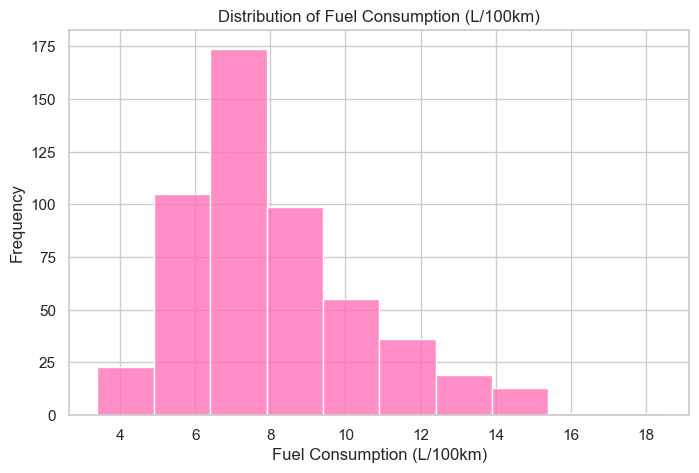

In [39]:

# Plot histogram for fuel consumption
plt.figure(figsize=(8,5))
sns.histplot(df['cons._l/100km'], bins=10, kde=False, color='#FF69B4')
plt.title('Distribution of Fuel Consumption (L/100km)')
plt.xlabel('Fuel Consumption (L/100km)')
plt.ylabel('Frequency')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_8424\3729882251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RANGE km'] = df['RANGE km'].astype(str).str.replace(',', '').astype(int)


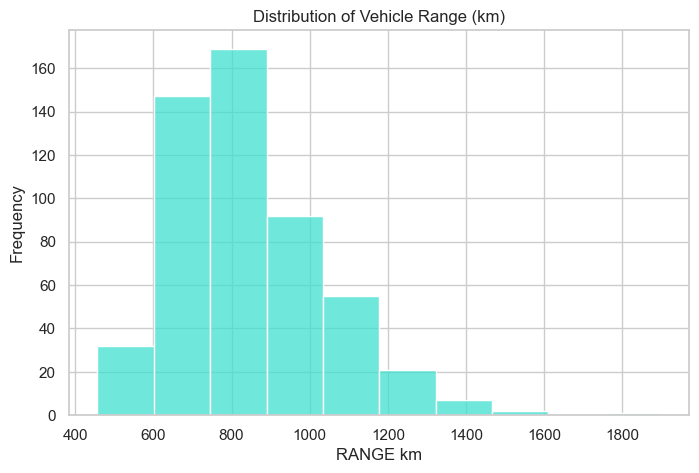

In [41]:

# Convert RANGE km to integer (remove commas)
df['RANGE km'] = df['RANGE km'].astype(str).str.replace(',', '').astype(int)

# Plot histogram for RANGE km
plt.figure(figsize=(8,5))
sns.histplot(df['RANGE km'], bins=10, kde=False, color='#40E0D0')
plt.title('Distribution of Vehicle Range (km)')
plt.xlabel('RANGE km')
plt.ylabel('Frequency')
#plt.savefig('Distribution of Vehicle Range (km)',dpi=100)
# Save the current figure
plt.savefig('Distribution_of_Vehicle_Range_km.png', dpi=100)
plt.show()


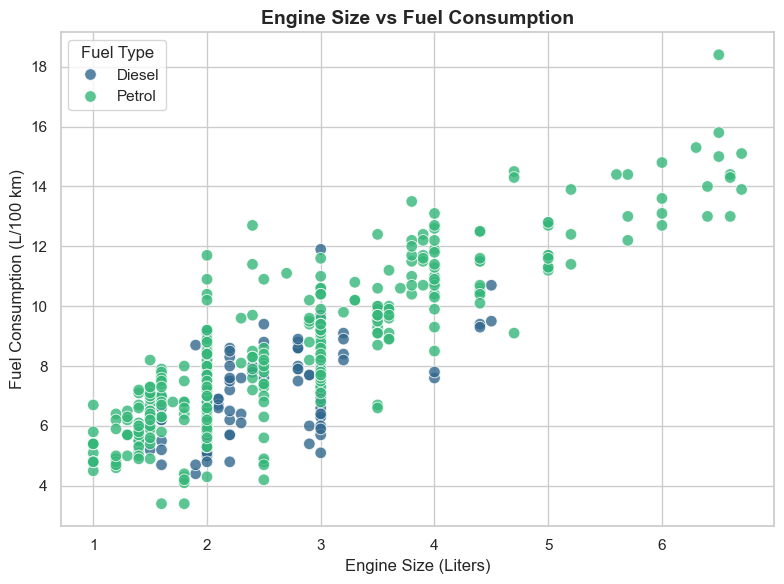

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='engine_l',
    y='cons._l/100km',
    hue='fuel_type',    # color points by fuel type (optional)
    palette='viridis',
    data=df,
    s=70,               # point size
    alpha=0.8           # transparency
)

# Add titles and labels
plt.title('Engine Size vs Fuel Consumption', fontsize=14, fontweight='bold')
plt.xlabel('Engine Size (Liters)')
plt.ylabel('Fuel Consumption (L/100 km)')
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()


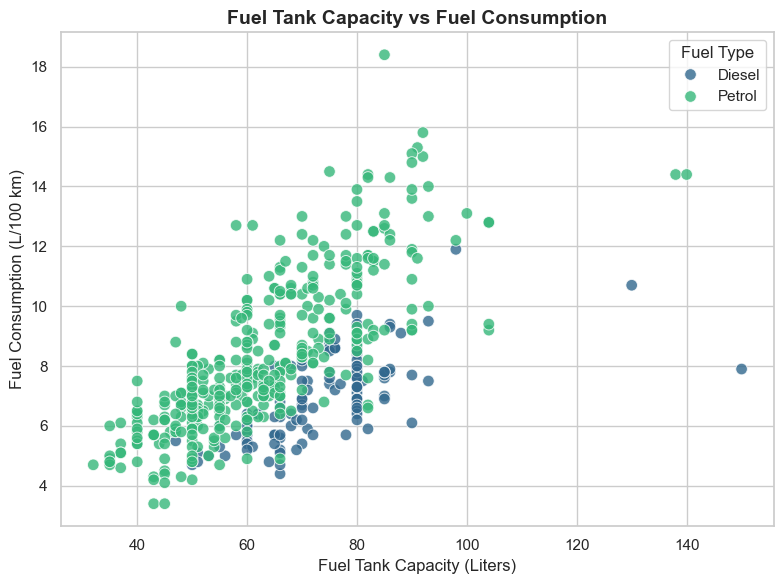

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='fuel_tank_l',
    y='cons._l/100km',
    hue='fuel_type',     # color points by fuel type
    palette='viridis',
    data=df,
    s=70,
    alpha=0.8
)

# Add titles and labels
plt.title('Fuel Tank Capacity vs Fuel Consumption', fontsize=14, fontweight='bold')
plt.xlabel('Fuel Tank Capacity (Liters)')
plt.ylabel('Fuel Consumption (L/100 km)')
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()


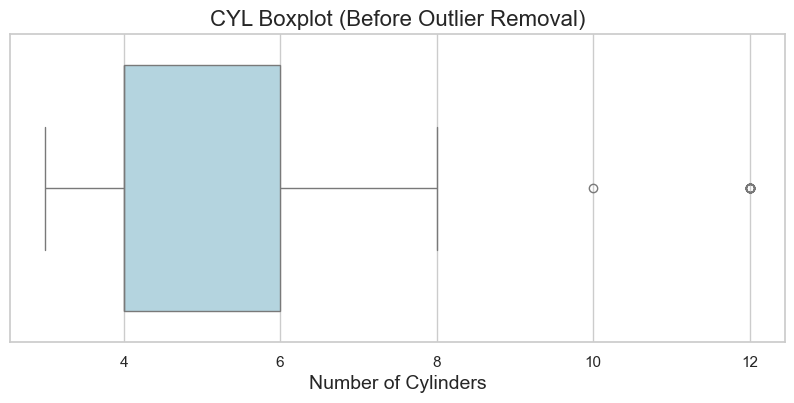

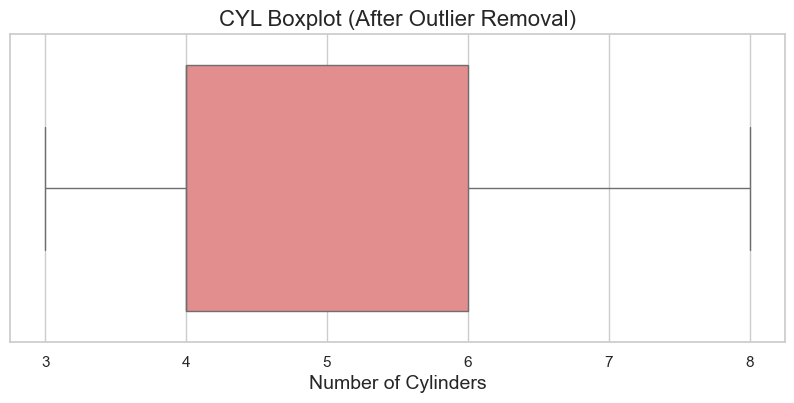

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Boxplot before outlier removal ---
plt.figure(figsize=(10,4))
sns.boxplot(x=df['cyl'], color='lightblue')
plt.title('CYL Boxplot (Before Outlier Removal)', fontsize=16)
plt.xlabel('Number of Cylinders', fontsize=14)
plt.show()

# --- Remove outliers using IQR ---
Q1 = df['cyl'].quantile(0.25)
Q3 = df['cyl'].quantile(0.75)
IQR = Q3 - Q1
df_cyl_clean = df[(df['cyl'] >= Q1 - 1.5*IQR) & (df['cyl'] <= Q3 + 1.5*IQR)]

# --- Boxplot after outlier removal ---
plt.figure(figsize=(10,4))
sns.boxplot(x=df_cyl_clean['cyl'], color='lightcoral')
plt.title('CYL Boxplot (After Outlier Removal)', fontsize=16)
plt.xlabel('Number of Cylinders', fontsize=14)
plt.show()


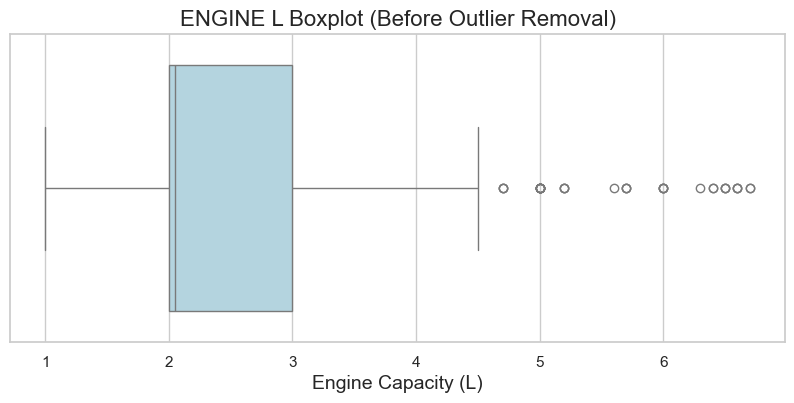

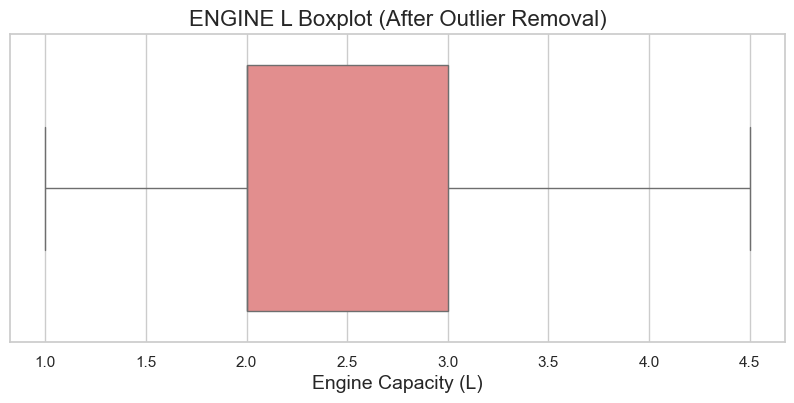

In [49]:
# --- Boxplot before outlier removal ---
plt.figure(figsize=(10,4))
sns.boxplot(x=df['engine_l'], color='lightblue')
plt.title('ENGINE L Boxplot (Before Outlier Removal)', fontsize=16)
plt.xlabel('Engine Capacity (L)', fontsize=14)
plt.show()

# --- Remove outliers using IQR ---
Q1 = df['engine_l'].quantile(0.25)
Q3 = df['engine_l'].quantile(0.75)
IQR = Q3 - Q1
df_engine_clean = df[(df['engine_l'] >= Q1 - 1.5*IQR) & (df['engine_l'] <= Q3 + 1.5*IQR)]

# --- Boxplot after outlier removal ---
plt.figure(figsize=(10,4))
sns.boxplot(x=df_engine_clean['engine_l'], color='lightcoral')
plt.title('ENGINE L Boxplot (After Outlier Removal)', fontsize=16)
plt.xlabel('Engine Capacity (L)', fontsize=14)
plt.show()


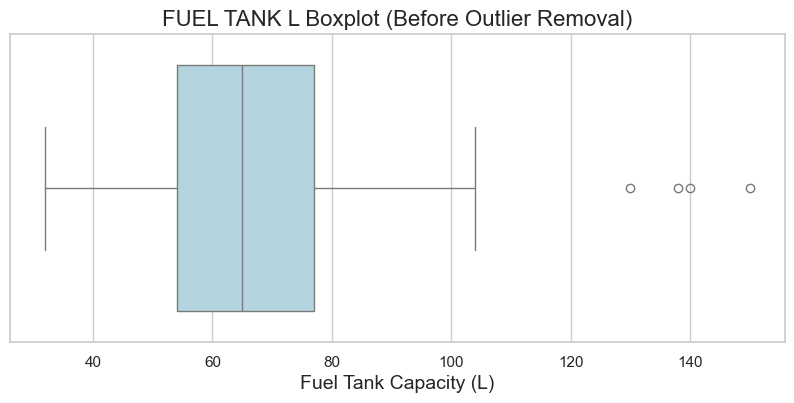

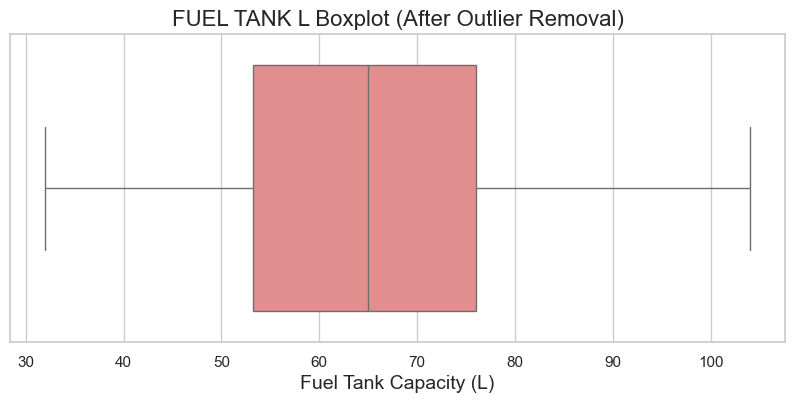

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Boxplot before outlier removal ---
plt.figure(figsize=(10,4))
sns.boxplot(x=df['fuel_tank_l'], color='lightblue')
plt.title('FUEL TANK L Boxplot (Before Outlier Removal)', fontsize=16)
plt.xlabel('Fuel Tank Capacity (L)', fontsize=14)
plt.show()

# --- Remove outliers using IQR ---
Q1 = df['fuel_tank_l'].quantile(0.25)
Q3 = df['fuel_tank_l'].quantile(0.75)
IQR = Q3 - Q1
df_fueltank_clean = df[(df['fuel_tank_l'] >= Q1 - 1.5*IQR) & (df['fuel_tank_l'] <= Q3 + 1.5*IQR)]

# --- Boxplot after outlier removal ---
plt.figure(figsize=(10,4))
sns.boxplot(x=df_fueltank_clean['fuel_tank_l'], color='lightcoral')
plt.title('FUEL TANK L Boxplot (After Outlier Removal)', fontsize=16)
plt.xlabel('Fuel Tank Capacity (L)', fontsize=14)
plt.show()


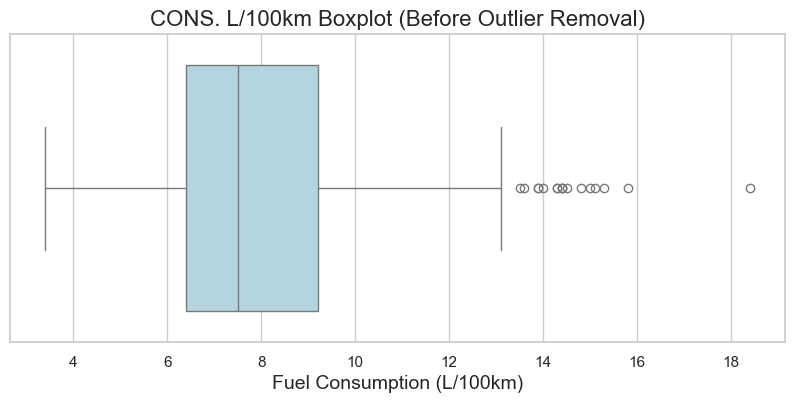

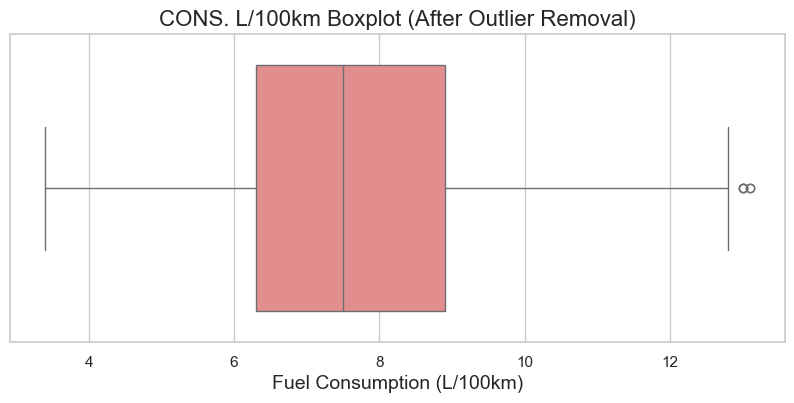

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Boxplot before outlier removal ---
plt.figure(figsize=(10,4))
sns.boxplot(x=df['cons._l/100km'], color='lightblue')
plt.title('CONS. L/100km Boxplot (Before Outlier Removal)', fontsize=16)
plt.xlabel('Fuel Consumption (L/100km)', fontsize=14)
plt.show()

# --- Remove outliers using IQR ---
Q1 = df['cons._l/100km'].quantile(0.25)
Q3 = df['cons._l/100km'].quantile(0.75)
IQR = Q3 - Q1
df_cons_clean = df[(df['cons._l/100km'] >= Q1 - 1.5*IQR) & (df['cons._l/100km'] <= Q3 + 1.5*IQR)]

# --- Boxplot after outlier removal ---
plt.figure(figsize=(10,4))
sns.boxplot(x=df_cons_clean['cons._l/100km'], color='lightcoral')
plt.title('CONS. L/100km Boxplot (After Outlier Removal)', fontsize=16)
plt.xlabel('Fuel Consumption (L/100km)', fontsize=14)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_8424\3292888060.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['range_km'] = pd.to_numeric(df['range_km'].astype(str).str.replace(',', ''), errors='coerce')


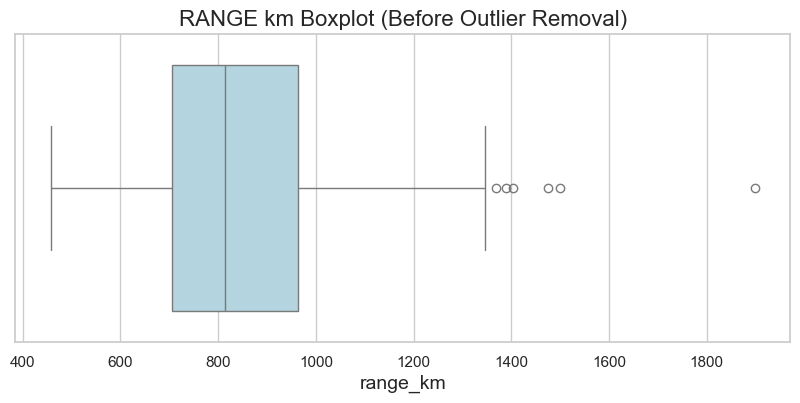

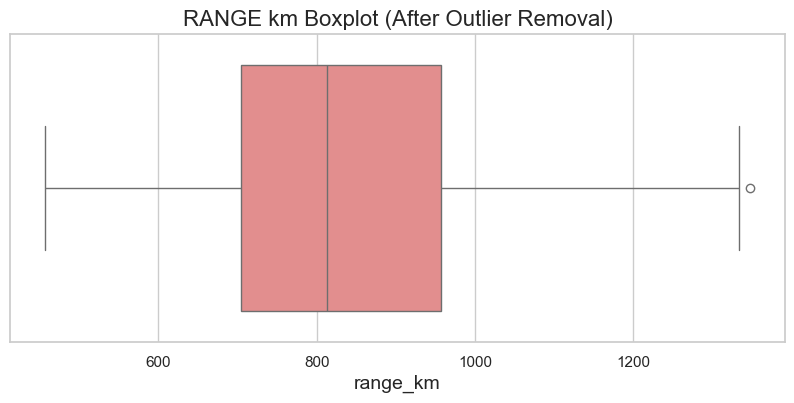

In [69]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the column exists and is a Series
# Convert to string first, remove commas, then convert to float
df['range_km'] = pd.to_numeric(df['range_km'].astype(str).str.replace(',', ''), errors='coerce')

# Optional: drop rows with invalid conversion
df = df.dropna(subset=['range_km'])

# Boxplot before outlier removal
plt.figure(figsize=(10,4))
sns.boxplot(x=df['range_km'], color='lightblue')
plt.title('RANGE km Boxplot (Before Outlier Removal)', fontsize=16)
plt.xlabel('range_km', fontsize=14)
plt.show()

# Remove outliers using IQR
Q1 = df['range_km'].quantile(0.25)
Q3 = df['range_km'].quantile(0.75)
IQR = Q3 - Q1
df_range_clean = df[(df['range_km'] >= Q1 - 1.5*IQR) & (df['range_km'] <= Q3 + 1.5*IQR)]

# Boxplot after outlier removal
plt.figure(figsize=(10,4))
sns.boxplot(x=df_range_clean['range_km'], color='lightcoral')
plt.title('RANGE km Boxplot (After Outlier Removal)', fontsize=16)
plt.xlabel('range_km', fontsize=14)
plt.show()



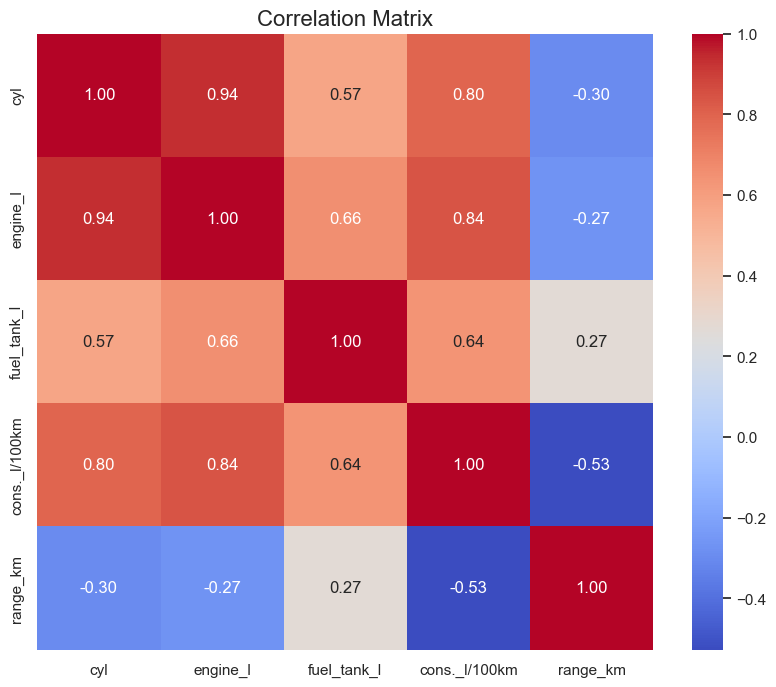

In [92]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1️⃣ Clean column names ---
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# --- 2️⃣ Convert all numeric-like columns safely ---
numeric_cols_candidates = ['range_km', 'fuel_tank_l', 'engine_l', 'cons._l/100km']  # add other numeric columns if needed
for col in numeric_cols_candidates:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '', regex=True), errors='coerce')

# --- Drop rows with any NaNs in numeric columns ---
df = df.dropna(subset=numeric_cols_candidates)

# --- 3️⃣ Select numeric columns ---
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# --- 4️⃣ Compute correlation matrix ---
corr_matrix = df[numeric_cols].corr()

# --- 5️⃣ Plot heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix', fontsize=16)

# --- 6️⃣ Save heatmap as PNG ---
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')

# --- 7️⃣ Show plot ---
plt.show()



In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset

# Clean column names (remove extra spaces just in case)
df.columns = df.columns.str.strip()

# Initialize LabelEncoder
le_fuel = LabelEncoder()

# Apply Label Encoding on FUEL_TYPE
df['FUEL_TYPE_encoded'] = le_fuel.fit_transform(df['fuel_type'])

# Show the mapping (category → number)
fuel_mapping = dict(zip(le_fuel.classes_, le_fuel.transform(le_fuel.classes_)))
print("FUEL_TYPE Mapping:", fuel_mapping)

# Show first few rows
print(df[['fuel_type', 'FUEL_TYPE_encoded']].head())


FUEL_TYPE Mapping: {'Diesel': 0, 'Petrol': 1}
  fuel_type  FUEL_TYPE_encoded
0    Diesel                  0
1    Diesel                  0
2    Diesel                  0
3    Diesel                  0
4    Diesel                  0


C:\Users\HP\AppData\Local\Temp\ipykernel_20352\937266298.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FUEL_TYPE_encoded'] = le_fuel.fit_transform(df['fuel_type'])


In [62]:

 y = df['cons._l/100km']      # target
X = df.drop(columns=['cons._l/100km', 'type', 'fuel_type'])  # features


## Split data for training and testing

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


## Model Selecting and Model Prediction

In [64]:

# --- 4️⃣ Convert object columns to numeric (remove commas) ---
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        # Remove commas and convert to float
        X_train[col] = pd.to_numeric(X_train[col].str.replace(',', ''), errors='coerce')
        X_test[col] = pd.to_numeric(X_test[col].str.replace(',', ''), errors='coerce')

# --- 5️⃣ Handle missing values ---
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_train.mean(), inplace=True)

# --- 6️⃣ Scale features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 7️⃣ Initialize models ---
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# --- 8️⃣ Train, predict, and evaluate ---
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

# --- 9️⃣ Display results ---
results_df = pd.DataFrame(results).T
print("Model Comparison:")
print(results_df)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model Comparison:
                        MAE      RMSE        R2
Linear Regression  0.329128  0.478787  0.954654
Decision Tree      0.476582  0.802015  0.872761
Random Forest      0.317373  0.573212  0.935004
Gradient Boosting  0.272934  0.440423  0.961630


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


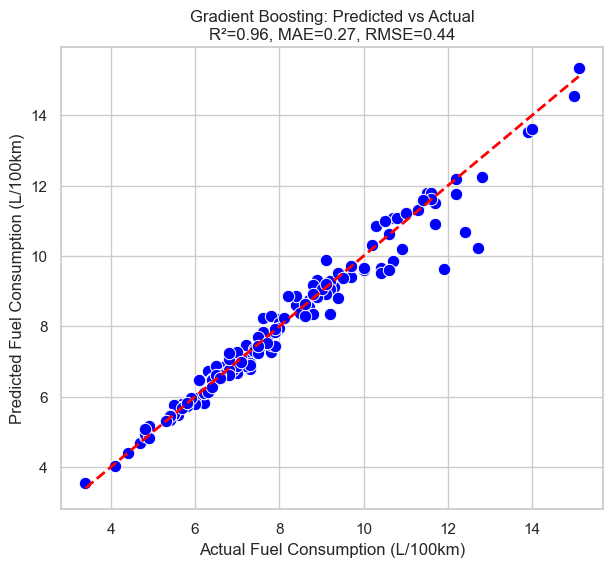

In [37]:
# 3️⃣ Scatter plot: Predicted vs Actual
# ----------------------------
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', s=80)

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

plt.title(f'Gradient Boosting: Predicted vs Actual\nR²={r2:.2f}, MAE={mae:.2f}, RMSE={rmse:.2f}')
plt.xlabel('Actual Fuel Consumption (L/100km)')
plt.ylabel('Predicted Fuel Consumption (L/100km)')
plt.grid(True)
plt.savefig('predicted_vs_actual_scatter.png', dpi=300, bbox_inches='tight')
 


## deployment

In [53]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [53]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from joblib import dump

# --- Example: Assume you've already trained your model and preprocessed your data ---

# Example model (replace this with your trained model)
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

# Example preprocessing tools (replace these with your fitted ones)
scaler = StandardScaler()
label_encoder = LabelEncoder()

# --- Train your model before saving ---
# Example (replace X_train, y_train with your real data)
# X_train_scaled = scaler.fit_transform(X_train)
# y_train_encoded = label_encoder.fit_transform(y_train)
# gb_model.fit(X_train_scaled, y_train_encoded)

# --- Save all fitted components using joblib ---
dump(gb_model, "gradient_boosting_model.pkl")
dump(scaler, "scaler.pkl")
dump(label_encoder, "label_encoder.pkl")

print("✅ Model, scaler, and label encoder have been saved successfully!")


✅ Model, scaler, and label encoder have been saved successfully!


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
import joblib

# Load dataset
df = pd.read_csv('vehicle_fuel_data.csv')

# Clean column names
df.columns = df.columns.str.strip().str.lower()

# List numeric columns
numeric_cols = ['cyl','engine l', 'fuel tank l', 'range km', 'cons. l/100km']

# Remove commas and convert to float
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

# Encode 'fuel_type'
label_encoder = LabelEncoder()
df['fuel_type_encoded'] = label_encoder.fit_transform(df['fuel_type'])

# Show mapping
fuel_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("🔤 FUEL_TYPE Mapping:", fuel_mapping)

# Define target and features
y = df['cons. l/100km']
X = df.drop(columns=['cons. l/100km', 'type', 'fuel_type'])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Train Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
gb_model.fit(X_train, y_train)

# Save model, scaler, and label encoder
joblib.dump(gb_model, 'gradient_boosting_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

print("✅ Model, scaler, and label encoder saved successfully!")


🔤 FUEL_TYPE Mapping: {'Diesel': 0, 'Petrol': 1}
✅ Model, scaler, and label encoder saved successfully!


In [16]:
from sklearn.preprocessing import LabelEncoder
type_label_encoder = LabelEncoder()
df['type'] = type_label_encoder.fit_transform(df['type'])
joblib.dump(type_label_encoder, 'type_label_encoder.pkl')


['type_label_encoder.pkl']